In [4]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import mapping, Polygon, MultiPoint, Point
from shapely.ops import unary_union, nearest_points
import networkx as nx
import matplotlib.pyplot as plt
import folium
import json
from tqdm import tqdm
from geopy.distance import geodesic
import numpy as np
from shapely.geometry import LineString, MultiLineString
import networkx as nx
from joblib import Parallel, delayed
from tqdm import tqdm
import pickle  

In [ ]:

file_path = "/lustrehome/niloofar/niloofar_work/roadnetwork/Apuglia/Buffer /inner cities/ALL.xlsx"
df = pd.read_excel(file_path)

\
# Convert dataset coordinates to a set of tuples
df_coords = set(zip(df['latitude'], df['longitude']))
df_coords -= points_to_remove

# Define city latitude and longitude (based on unique city names in the dataset)
city_data = df.groupby('city name')[['city_latitude', 'city_longitude']].mean().reset_index()

# Initialize the map centered on the region (mean of bridge locations)
map_center = [df['latitude'].mean(), df['longitude'].mean()]
bridge_map = folium.Map(location=map_center, zoom_start=12)

# Add markers for each bridge in the dataset
for _, row in df.iterrows():
    lat, lon = row['latitude'], row['longitude']
    city = row['city name']

    if (lat, lon) in points_to_remove:  # Skip points marked for removal
        continue

    folium.Marker(
        location=[lat, lon],
        popup=(
            f"<b>Bridge IOP:</b> {row['Bridge_IOP']}<br>"
            f"<b>City:</b> {city}<br>"
            f"<b>Latitude:</b> {lat}<br>"
            f"<b>Longitude:</b> {lon}"
        ),
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(bridge_map)

# Add city markers
for _, city_row in city_data.iterrows():
    city_lat, city_lon, city_name = city_row['city_latitude'], city_row['city_longitude'], city_row['city name']
    folium.Marker(
        location=[city_lat, city_lon],
        popup=(
            f"<b>City Center:</b> {city_name}<br>"
            f"<b>Latitude:</b> {city_lat}<br>"
            f"<b>Longitude:</b> {city_lon}"
        ),
        icon=folium.Icon(color="green", icon="star")
    ).add_to(bridge_map)

bridge_map


In [36]:
import folium
import pandas as pd

# Load the dataset for bridges and cities
file_path = "/lustrehome/niloofar/niloofar_work/roadnetwork/Apuglia/Buffer /inner cities/ALL.xlsx"
df = pd.read_excel(file_path)

# Remove specific points if needed
points_to_remove = {(41.878567, 15.83983), (41.878507, 15.839833)}

# Convert dataset coordinates to a set of tuples
df_coords = set(zip(df['latitude'], df['longitude']))
df_coords -= points_to_remove

# Define city latitude and longitude (based on unique city names in the dataset)
city_data = df.groupby('city name')[['city_latitude', 'city_longitude']].mean().reset_index()

# Initialize the map centered on the region (mean of bridge locations)
map_center = [df['latitude'].mean(), df['longitude'].mean()]
bridge_map = folium.Map(location=map_center, zoom_start=12, tiles='CartoDB positron')  # Use CartoDB positron for a clean, solid background

# Add markers for each bridge in the dataset
for _, row in df.iterrows():
    lat, lon = row['latitude'], row['longitude']
    city = row['city name']

    if (lat, lon) in points_to_remove:  # Skip points marked for removal
        continue

    folium.Marker(
        location=[lat, lon],
        popup=(
            f"<b>Bridge IOP:</b> {row['Bridge_IOP']}<br>"
            f"<b>City:</b> {city}<br>"
            f"<b>Latitude:</b> {lat}<br>"
            f"<b>Longitude:</b> {lon}"
        ),
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(bridge_map)

# Add city markers
for _, city_row in city_data.iterrows():
    city_lat, city_lon, city_name = city_row['city_latitude'], city_row['city_longitude'], city_row['city name']
    folium.Marker(
        location=[city_lat, city_lon],
        popup=(
            f"<b>City Center:</b> {city_name}<br>"
            f"<b>Latitude:</b> {city_lat}<br>"
            f"<b>Longitude:</b> {city_lon}"
        ),
        icon=folium.Icon(color="green", icon="star")
    ).add_to(bridge_map)

# Save and display the map
bridge_map


In [38]:

file_path = "/lustrehome/niloofar/niloofar_work/roadnetwork/Apuglia/Buffer /inner cities/ALL.xlsx"
df = pd.read_excel(file_path)

# Remove specific points if needed
points_to_remove = {(41.878567, 15.83983), (41.878507, 15.839833)}

# Convert dataset coordinates to a set of tuples
df_coords = set(zip(df['latitude'], df['longitude']))
df_coords -= points_to_remove

# Define city latitude and longitude (based on unique city names in the dataset)
city_data = df.groupby('city name')[['city_latitude', 'city_longitude']].mean().reset_index()

# Initialize the map centered on the region (mean of bridge locations)
map_center = [df['latitude'].mean(), df['longitude'].mean()]
bridge_map = folium.Map(location=map_center, zoom_start=12, tiles='CartoDB positron')  # Use CartoDB positron for a clean, solid background

# Add markers for each bridge in the dataset (smaller, circular)
for _, row in df.iterrows():
    lat, lon = row['latitude'], row['longitude']
    city = row['city name']

    if (lat, lon) in points_to_remove:  # Skip points marked for removal
        continue

    folium.CircleMarker(
        location=[lat, lon],
        radius=4,  # Smaller circle for bridges
        popup=(
            f"<b>Bridge IOP:</b> {row['Bridge_IOP']}<br>"
            f"<b>City:</b> {city}<br>"
            f"<b>Latitude:</b> {lat}<br>"
            f"<b>Longitude:</b> {lon}"
        ),
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.6
    ).add_to(bridge_map)

# Add city markers (square markers for differentiation)
for _, city_row in city_data.iterrows():
    city_lat, city_lon, city_name = city_row['city_latitude'], city_row['city_longitude'], city_row['city name']
    folium.Marker(
        location=[city_lat, city_lon],
        popup=(
            f"<b>City Center:</b> {city_name}<br>"
            f"<b>Latitude:</b> {city_lat}<br>"
            f"<b>Longitude:</b> {city_lon}"
        ),
        icon=folium.Icon(color="green", icon="square", icon_color="white")
    ).add_to(bridge_map)

# Save and display the map
bridge_map


In [49]:

file_path = "/lustrehome/niloofar/niloofar_work/roadnetwork/Apuglia/Buffer /inner cities/ALL.xlsx"
df = pd.read_excel(file_path)

# Remove specific points if needed
points_to_remove = {(41.878567, 15.83983), (41.878507, 15.839833)}

# Convert dataset coordinates to a set of tuples
df_coords = set(zip(df['latitude'], df['longitude']))
df_coords -= points_to_remove

# Define city latitude and longitude (based on unique city names in the dataset)
city_data = df.groupby('city name')[['city_latitude', 'city_longitude']].mean().reset_index()

# Initialize the map centered on the region (mean of bridge locations)
map_center = [df['latitude'].mean(), df['longitude'].mean()]
bridge_map = folium.Map(location=map_center, zoom_start=12, tiles='CartoDB positron')  # Use CartoDB positron for a clean, solid background

# Add markers for each bridge in the dataset (smaller, circular)
for _, row in df.iterrows():
    lat, lon = row['latitude'], row['longitude']
    city = row['city name']

    if (lat, lon) in points_to_remove:  # Skip points marked for removal
        continue

    folium.CircleMarker(
        location=[lat, lon],
        radius=4,  # Smaller circle for bridges
        popup=(
            f"<b>Bridge IOP:</b> {row['Bridge_IOP']}<br>"
            f"<b>City:</b> {city}<br>"
            f"<b>Latitude:</b> {lat}<br>"
            f"<b>Longitude:</b> {lon}"
        ),
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.6
    ).add_to(bridge_map)

# Add city markers (green circular markers)
for _, city_row in city_data.iterrows():
    city_lat, city_lon, city_name = city_row['city_latitude'], city_row['city_longitude'], city_row['city name']
    
    folium.CircleMarker(
        location=[city_lat, city_lon],
        radius=6,  # Adjust the radius size for the circle
        popup=(
            f"<b>City Center:</b> {city_name}<br>"
            f"<b>Latitude:</b> {city_lat}<br>"
            f"<b>Longitude:</b> {city_lon}"
        ),
        color="green",  # Green circle
        fill=True,
        fill_color="green",  # Green fill color
        fill_opacity=0.6
    ).add_to(bridge_map)

# Save and display the map
bridge_map


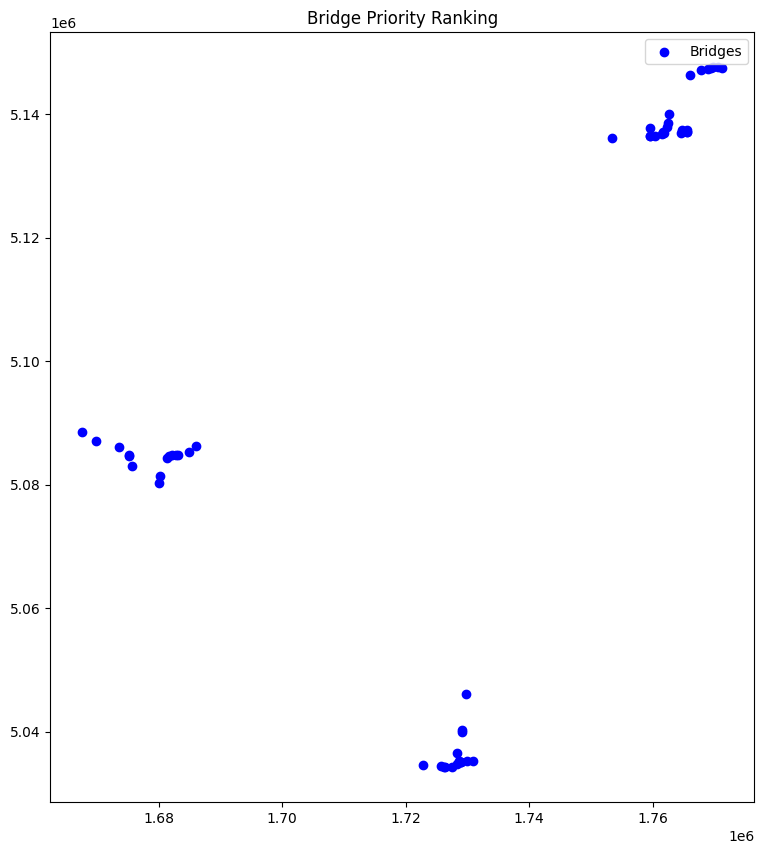

In [58]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON file
bridges = gpd.read_file('bridge_priority.geojson')

# Plot the data
fig, ax = plt.subplots(figsize=(10, 10))
bridges.plot(ax=ax, color='blue', marker='o', label='Bridges')

# Optionally, plot city locations too, if you have their coordinates in a separate dataset
# For this, you'd need to load and plot a city dataset similarly

plt.title('Bridge Priority Ranking')
plt.legend()
plt.show()


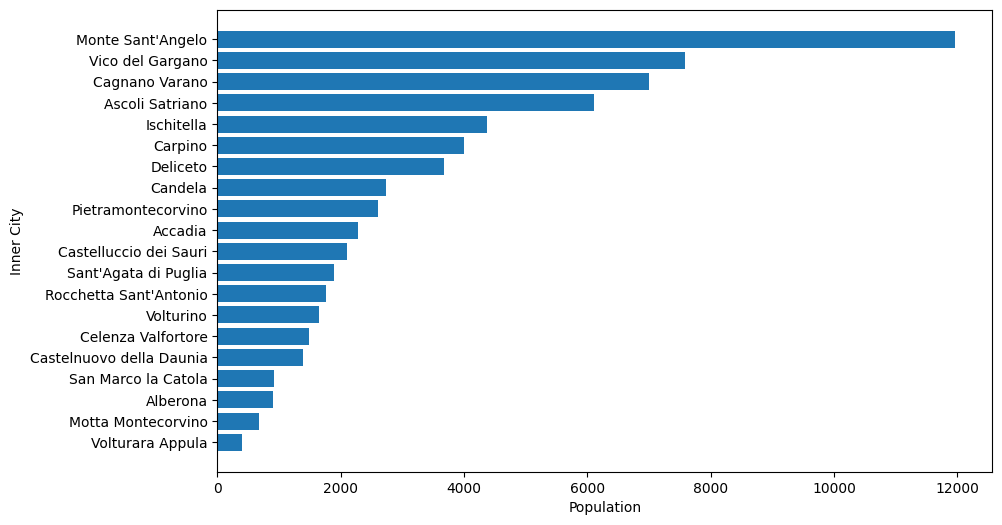

In [1]:
import matplotlib.pyplot as plt

# City names and corresponding populations
cities = [
    "Ascoli Satriano", "Cagnano Varano", "Candela", "Carpino", "Castelluccio dei Sauri", 
    "Castelnuovo della Daunia", "Celenza Valfortore", "Deliceto", "Ischitella", "Monte Sant'Angelo", 
    "Motta Montecorvino", "Pietramontecorvino", "Rocchetta Sant'Antonio", "San Marco la Catola", 
    "Sant'Agata di Puglia", "Volturara Appula", "Volturino", "Accadia", "Alberona","Vico del Gargano"
]

populations = [
    6102, 6994, 2732, 4008, 2097, 1395, 1485, 3671, 4373, 11969, 682, 
    2612, 1767, 925, 1886, 397, 1656, 2277, 902, 7588
]

# Sort cities by population for better visualization
sorted_data = sorted(zip(populations, cities), reverse=True)
populations_sorted, cities_sorted = zip(*sorted_data)

# Create bar chart
plt.figure(figsize=(10, 6))
plt.barh(cities_sorted, populations_sorted) 

# Labels and title
plt.xlabel("Population")
plt.ylabel("Inner City")
plt.gca().invert_yaxis() 

plt.savefig('city_populations_foggia.png', format='png')
plt.savefig('city_populations_foggia.tif', format='tiff')  

plt.show()


In [5]:
# Load the datasets
file_path1 = "/lustrehome/niloofar/niloofar_work/roadnetwork/Apuglia/Buffer /inner cities/ALL.xlsx"
df_all = pd.read_excel(file_path1)  # Cities and Bridges dataset

In [7]:

bridge_counts = df_all.groupby("city name")["Bridge_IOP"].nunique().reset_index()

# Rename columns for clarity
bridge_counts.columns = ["City", "Number of Bridges"]

# Display the result
print(bridge_counts)


                        City  Number of Bridges
0                    Accadia                  1
1                   Alberona                  9
2            Ascoli Satriano                 20
3             Cagnano Varano                 19
4                    Candela                 23
5                    Carpino                 26
6     Castelluccio dei Sauri                  8
7   Castelnuovo della Daunia                  1
8         Celenza Valfortore                  4
9                   Deliceto                  3
10                Ischitella                 21
11         Monte Sant'Angelo                  2
12        Motta Montecorvino                 12
13        Pietramontecorvino                  6
14    Rocchetta Sant'Antonio                 14
15       San Marco la Catola                  6
16      Sant'Agata di Puglia                  3
17          Vico del Gargano                 13
18          Volturara Appula                 14
19                 Volturino            

In [8]:
# Check if there are duplicate bridge IDs within each city
duplicates = df_all.duplicated(subset=["city name", "Bridge_IOP"])
print(f"Number of duplicate bridge entries: {duplicates.sum()}")


Number of duplicate bridge entries: 0


In [9]:
# Count unique bridges (Bridge_IOP) in the dataset
unique_bridges = df_all["Bridge_IOP"].nunique()

# Display the result
print(f"Number of unique bridges: {unique_bridges}")


Number of unique bridges: 79


In [11]:
import folium

# Initialize a Folium map centered around Foggia (you can adjust this as needed)
map_center = [41.7100, 15.5400]  # Coordinates of Foggia (or approximate center)
m = folium.Map(location=map_center, zoom_start=10)

# Loop through the DataFrame and add each bridge as a marker
for _, row in df_all.iterrows():
    # Coordinates for each bridge
    lat, lon = row["latitude"], row["longitude"]
    city_name = row["city name"]
    bridge_iop = row["Bridge_IOP"]
    
    # Add a marker for each bridge
    folium.Marker(
        location=[lat, lon],
        popup=f"Bridge: {bridge_iop}<br>City: {city_name}",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(m)

# Save the map to an HTML file
m.save("bridges_map.html")

# Show the map (you can view it in a Jupyter notebook or directly open the HTML file)
m


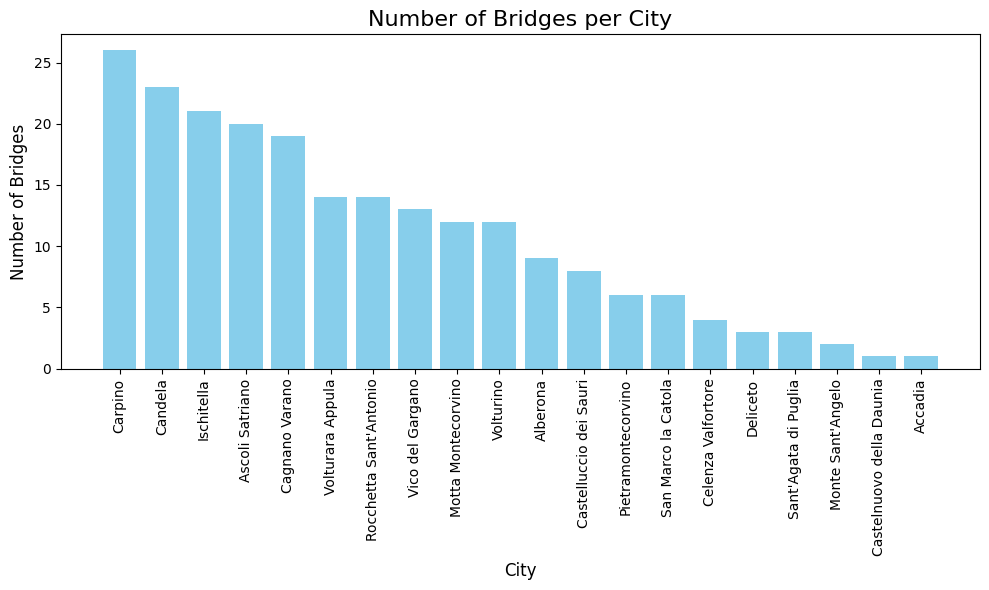

In [14]:
import matplotlib.pyplot as plt

# Assuming bridge_counts is already calculated
# Sort the values by the number of bridges for better visualization
bridge_counts = bridge_counts.sort_values(by="Number of Bridges", ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(bridge_counts["City"], bridge_counts["Number of Bridges"], color="skyblue")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add title and labels
plt.title("Number of Bridges per City", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Number of Bridges", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()
